In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)
print("Number of classes:", len(np.unique(y_train)))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data: (50000, 32, 32, 3)
Testing data: (10000, 32, 32, 3)
Number of classes: 10


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
val_size = int(0.15 * len(x_train))
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(1024, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,685,130 (56.02 MB)

 Trainable params: 14,683,786 (56.01 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=3
)

In [9]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.2738 - loss: 2.0973 - val_accuracy: 0.3845 - val_loss: 1.7913 - learning_rate: 1.0000e-04
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.4626 - loss: 1.4723 - val_accuracy: 0.5399 - val_loss: 1.3097 - learning_rate: 1.0000e-04
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.5482 - loss: 1.2514 - val_accuracy: 0.6152 - val_loss: 1.0936 - learning_rate: 1.0000e-04
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.6153 - loss: 1.0840 - val_accuracy: 0.6819 - val_loss: 0.8890 - learning_rate: 1.0000e-04
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.6516 - loss: 0.9853 - val_accuracy: 0.6849 - val_loss: 0.9096 - learning_rate: 1.0000e-04
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.6925 - loss: 0.8838 - val_accuracy: 0.7013 - val_loss: 0.8536 - learning_rate: 1.0000e-04
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 28s 4

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-6),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1,
    initial_epoch=52,
)

Epoch 53/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.9954 - loss: 0.0153 - val_accuracy: 0.8827 - val_loss: 0.6026 - learning_rate: 2.0000e-06
Epoch 54/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.8828 - val_loss: 0.6051 - learning_rate: 2.0000e-06
Epoch 55/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.8833 - val_loss: 0.6053 - learning_rate: 2.0000e-06
Epoch 56/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.8823 - val_loss: 0.6076 - learning_rate: 2.0000e-06
Epoch 57/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9954 - loss: 0.0159 - val_accuracy: 0.8851 - val_loss: 0.6054 - learning_rate: 2.0000e-06
Epoch 58/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.8829 - val_loss: 0.6066 - learning_rate: 2.0000e-06
Epoch 59/100
665/665 ━━━━━━━━━━━━━━━━━━━

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=4e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1,
    initial_epoch=62,
)

Epoch 63/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9090 - loss: 0.2764 - val_accuracy: 0.7888 - val_loss: 0.7502 - learning_rate: 4.0000e-04
Epoch 64/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8776 - loss: 0.3710 - val_accuracy: 0.7881 - val_loss: 0.7681 - learning_rate: 4.0000e-04
Epoch 65/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8899 - loss: 0.3254 - val_accuracy: 0.7936 - val_loss: 0.7309 - learning_rate: 4.0000e-04
Epoch 66/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8906 - loss: 0.3248 - val_accuracy: 0.8232 - val_loss: 0.6217 - learning_rate: 4.0000e-04
Epoch 67/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9106 - loss: 0.2650 - val_accuracy: 0.8393 - val_loss: 0.5650 - learning_rate: 4.0000e-04
Epoch 68/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9070 - loss: 0.2767 - val_accuracy: 0.8421 - val_loss: 0.5424 - learning_rate: 4.0000e-04
Epoch 69/100
665/665 ━━━━━━━━━━━━━━━━━━━

In [23]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
print(f"Train Accuracy: {train_acc:.4f}")

1329/1329 - 13s - 10ms/step - accuracy: 1.0000 - loss: 3.9475e-05
Train Accuracy: 1.0000


In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.8832 - loss: 0.7502
Test Accuracy: 0.8832


In [25]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print(f"validation Accuracy: {val_acc:.4f}")

235/235 - 2s - 9ms/step - accuracy: 0.8909 - loss: 0.6739
validation Accuracy: 0.8909


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1000
           1       0.94      0.94      0.94      1000
           2       0.86      0.82      0.84      1000
           3       0.78      0.78      0.78      1000
           4       0.84      0.90      0.87      1000
           5       0.84      0.81      0.82      1000
           6       0.92      0.93      0.92      1000
           7       0.92      0.92      0.92      1000
           8       0.92      0.94      0.93      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



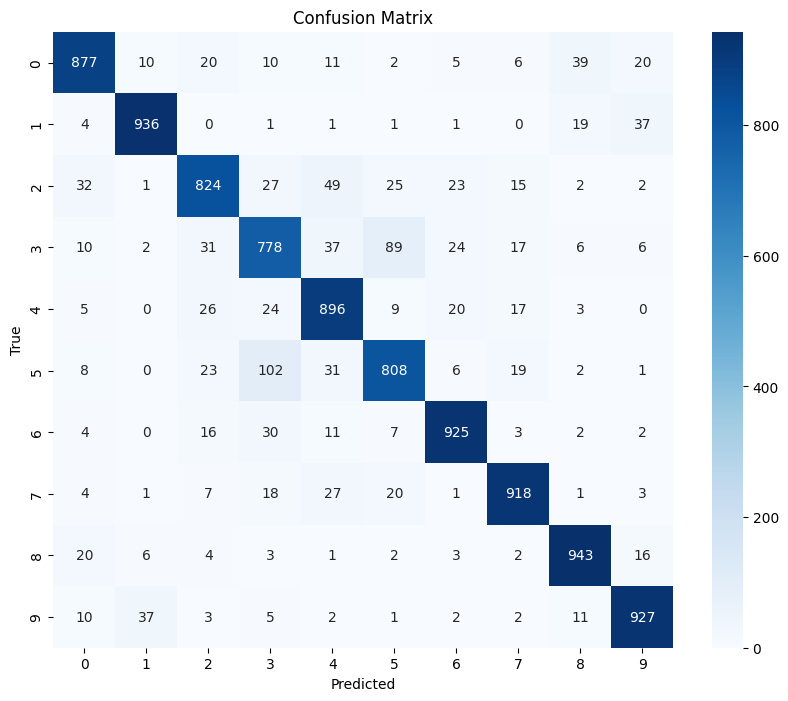

In [26]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [27]:
model.save("/content/drive/MyDrive/image_classification.keras")